# Auto Encoder

## What are you going to learn
+ What is Autoencoder
+ Autoencoder application
+ example code

## What is Autoencoder?

+ ***Unsupervised Learning*** is applied on X without y: data without labels. A typical use case is to find hidden structure in the data.
+ An autoencoder is a neural network that is trained to attempt to copy its input to its output.
+ The network consists of two parts: an ***encoder*** and a ***decoder*** that produce a reconstruction

### encoder & decoder
+ Encoder function: $z = f(x)$
+ Decoder function: $x = g(z)$
+ We learn to set  $g(f(x))=x$

## Autoencoder with Scikit-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

### Load MNIST Data
+ Use (1, 5, 6) digits to visualize latent space in 2-D
+ The data are 28*28 images

In [5]:
train_x = np.load('./data_files/mnist_train_images.npy')
train_y = np.load('./data_files/mnist_train_labels.npy')
test_x = np.load('./data_files/mnist_test_images.npy')
test_y = np.load('./data_files/mnist_test_labels.npy')

n_train = train_x.shape[0]
n_test = test_x.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_x.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_x.shape))

The number of training images : 16583, shape : (16583, 784)
The number of testing images : 2985, shape : (2985, 784)


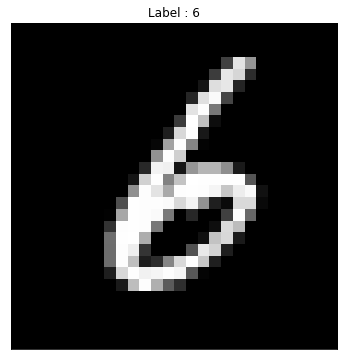

In [6]:
idx = np.random.randint(train_x.shape[0])
img = train_x[idx].reshape(28,28)

plt.figure(figsize = (6,6))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[idx,:])))
plt.xticks([])
plt.yticks([])
plt.show()

### Define the Structure of an Autoencoder
+ Input shape
+ Latent variable shape
+ Encoder shape
+ Decoder shape

In [7]:
n_input = 28*28

# Encoder structure
n_encoder1 = 500
n_encoder2 = 300

n_latent = 2

# Decoder structure
n_decoder2 = 300
n_decoder1 = 500

### Build a model
+ Both for Encoder and Decoder, use ***tanh*** as a nonlinear activation function
+ optimizer -> Adam

In [8]:
reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1), 
                   activation = 'tanh', 
                   solver = 'adam', 
                   learning_rate_init = 0.0001, 
                   max_iter = 20, 
                   tol = 0.0000001, 
                   verbose = True)

In [9]:
reg.fit(train_x, train_x)

Iteration 1, loss = 0.03307335
Iteration 2, loss = 0.02363504
Iteration 3, loss = 0.02272486
Iteration 4, loss = 0.02257369
Iteration 5, loss = 0.02252282
Iteration 6, loss = 0.02245356
Iteration 7, loss = 0.02233657
Iteration 8, loss = 0.02219762
Iteration 9, loss = 0.02210717
Iteration 10, loss = 0.02207433
Iteration 11, loss = 0.02205532
Iteration 12, loss = 0.02204510
Iteration 13, loss = 0.02204037
Iteration 14, loss = 0.02203893
Iteration 15, loss = 0.02203376
Iteration 16, loss = 0.02203186
Iteration 17, loss = 0.02202321
Iteration 18, loss = 0.02202171
Iteration 19, loss = 0.02201464
Iteration 20, loss = 0.02200803


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(500, 300, 2, 300, 500),
             learning_rate_init=0.0001, max_iter=20, tol=1e-07, verbose=True)

### test & evaluate

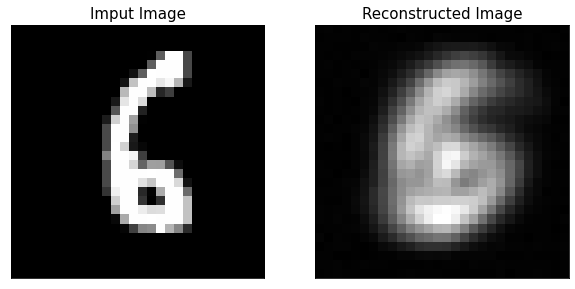

In [10]:
idx = np.random.randint(test_x.shape[0])
x_reconst = reg.predict(test_x[idx].reshape(-1,784))

plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(test_x[idx].reshape(28,28), 'gray')
plt.title('Imput Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(x_reconst.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()


+ To see the distribution of latent variables, we make a projection of 784-dimensional image space onto 2-dimensional latent space

In [11]:
def encoder(data):
    data = np.asmatrix(data)
    
    encoder1 = data*reg.coefs_[0] + reg.intercepts_[0]
    encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))
    
    encoder2 = encoder1*reg.coefs_[1] + reg.intercepts_[1]
    encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))
    
    latent = encoder2*reg.coefs_[2] + reg.intercepts_[2]
    latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))
    
    return np.asarray(latent)

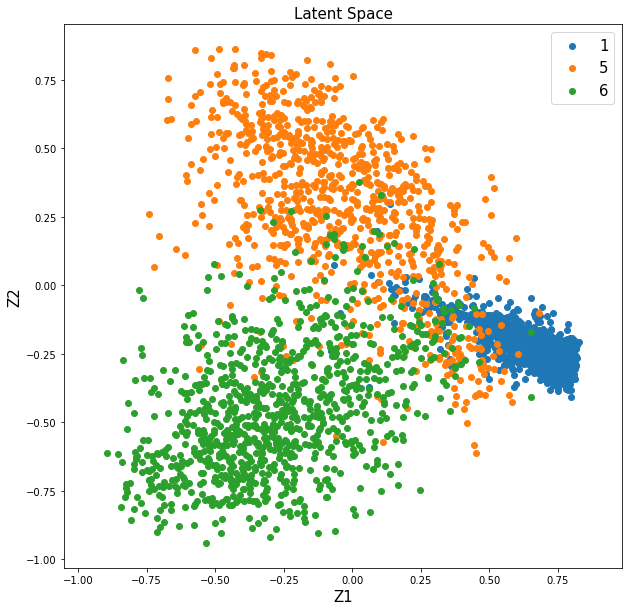

In [12]:
test_latent = encoder(test_x)

plt.figure(figsize = (10,10))
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 1,0], test_latent[np.argmax(test_y, axis = 1) == 1,1], label = '1')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 5,0], test_latent[np.argmax(test_y, axis = 1) == 5,1], label = '5')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 6,0], test_latent[np.argmax(test_y, axis = 1) == 6,1], label = '6')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

In [13]:
def decoder(new_data):
    new_data = np.asmatrix(new_data)
    decoder2 = new_data*reg.coefs_[3] + reg.intercepts_[3]
    decoder2 = (np.exp(decoder2) - np.exp(-decoder2))/(np.exp(decoder2) + np.exp(-decoder2))

    decoder1 = decoder2*reg.coefs_[4] + reg.intercepts_[4]
    decoder1 = (np.exp(decoder1) - np.exp(-decoder1))/(np.exp(decoder1) + np.exp(-decoder1))

    reconst = decoder1*reg.coefs_[5] + reg.intercepts_[5]
    reconst = (np.exp(reconst) - np.exp(-reconst))/(np.exp(reconst) + np.exp(-reconst))

    return np.asarray(reconst)

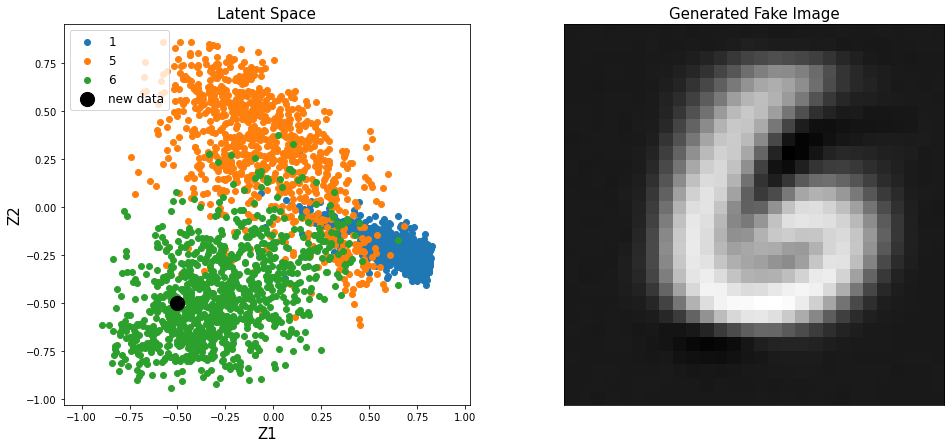

In [18]:
latent = np.array([[-0.5, -0.5]])
reconst = decoder(latent)

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 1,0], test_latent[np.argmax(test_y, axis = 1) == 1,1], label = '1')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 5,0], test_latent[np.argmax(test_y, axis = 1) == 5,1], label = '5')
plt.scatter(test_latent[np.argmax(test_y, axis = 1) == 6,0], test_latent[np.argmax(test_y, axis = 1) == 6,1], label = '6')
plt.scatter(latent[:,0], latent[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(reconst.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()